In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rescale=1./255,validation_split=0.2
    )


batch = 32

train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Capstone Project 4/Data',
    target_size=(150, 150),
    batch_size = batch, color_mode='rgb',
    class_mode = 'categorical',
    subset = 'training')

test_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Capstone Project 4/Data',
    target_size=(150, 150),
    batch_size = batch, color_mode='rgb',
    class_mode = 'categorical',
    subset = 'validation')

Found 96 images belonging to 3 classes.
Found 23 images belonging to 3 classes.


In [ ]:
print(train_generator.samples)
print(len(train_generator.class_indices))
print(train_generator.class_indices)
print(" ")
print(test_generator.samples)
print(len(test_generator.class_indices))
print(test_generator.class_indices)

96
3
{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}
 
23
3
{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}


In [ ]:
img, label = train_generator.next()
print(img.shape)



/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


(32, 150, 150, 3)


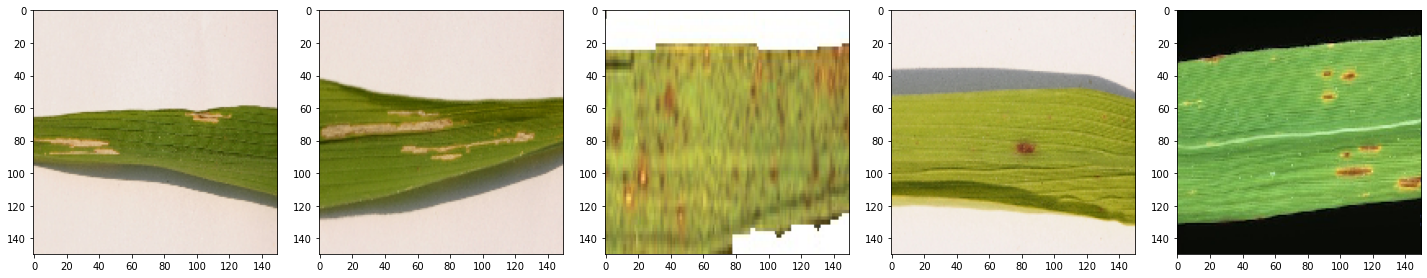

In [ ]:
fig, ax = plt.subplots(ncols = 5, figsize = (20,20),)
plt.tight_layout()
ax[0].imshow((tf.squeeze(img[0])))
ax[1].imshow((tf.squeeze(img[1])))
ax[2].imshow((tf.squeeze(img[2])))
ax[3].imshow((tf.squeeze(img[3])))
ax[4].imshow((tf.squeeze(img[4])))


plt.show()


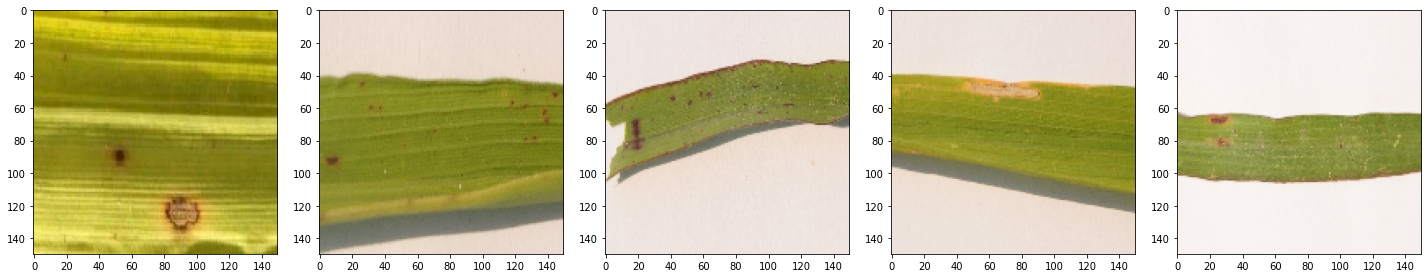

In [ ]:
fig, ax = plt.subplots(ncols = 5, figsize = (20,20),)
plt.tight_layout()
ax[0].imshow((tf.squeeze(img[5])))
ax[1].imshow((tf.squeeze(img[6])))
ax[2].imshow((tf.squeeze(img[7])))
ax[3].imshow((tf.squeeze(img[8])))
ax[4].imshow((tf.squeeze(img[9])))


In [ ]:
train_generator[1]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Activation, BatchNormalization, MaxPooling2D,InputLayer, GlobalAveragePooling2D
from keras import optimizers, losses, activations, models

In [ ]:
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(2,2),input_shape=(150, 150, 3), activation='relu',))

model.add(MaxPool2D(pool_size=(1, 1)))



model.add(Conv2D(filters=64, kernel_size=(2,2),input_shape=(150, 150, 3), activation='relu',))

model.add(MaxPool2D(pool_size=(1, 1)))

model.add(Conv2D(filters=64, kernel_size=(2,2),input_shape=(150, 150, 3), activation='relu',))


model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))


model.compile(  loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                  patience = 5,
                                                  mode = 'min')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 149, 149, 32)      416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 148, 148, 64)      8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 148, 148, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 64)      16448     
_________________________________________________________________
flatten (Flatten)            (None, 1382976)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [ ]:
history = model.fit_generator(generator = train_generator,
                              validation_data=test_generator,
                              epochs=100, steps_per_epoch=3,
                              verbose=1, validation_steps=1,
                              callbacks=early_stopping)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
3/3 [==============================] - 53s 13s/step - loss: 63.2047 - accuracy: 0.2708 - val_loss: 39.6269 - val_accuracy: 0.3043
Epoch 2/100
3/3 [==============================] - 18s 6s/step - loss: 21.6521 - accuracy: 0.2812 - val_loss: 3.9877 - val_accuracy: 0.4783
Epoch 3/100
3/3 [==============================] - 18s 6s/step - loss: 3.4852 - accuracy: 0.4688 - val_loss: 1.3495 - val_accuracy: 0.3478
Epoch 4/100
3/3 [==============================] - 18s 6s/step - loss: 1.7964 - accuracy: 0.5208 - val_loss: 1.1928 - val_accuracy: 0.4783
Epoch 5/100
3/3 [==============================] - 18s 6s/step - loss: 0.8816 - accuracy: 0.5729 - val_loss: 1.5667 - val_accuracy: 0.3913
Epoch 6/100
3/3 [==============================] - 18s 6s/step - loss: 0.8191 - accuracy: 0.6250 - val_loss: 1.2504 - val_accuracy: 0.3913
Epoch 7/100
3/3 [==============================] - 18s 6s/step - loss: 0.6520 - accuracy: 0.7708 - val_loss: 1.1534 - val_accuracy: 0.3913
Epoch 8/100
3/3 [======

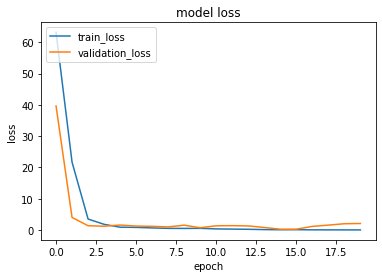

In [ ]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

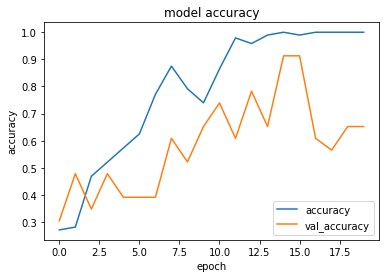

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model.save_weights('model_weights.h5')
model.save('/content/drive/MyDrive/Capstone Project 4')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Capstone Project 4/assets


In [ ]:
model1 = tf.keras.applications.inception_v3.InceptionV3(
    include_top=False, weights='imagenet', input_tensor=None,
    input_shape=(150,150,3), classes=3,
    classifier_activation='softmax'
)
model1.trainable = False

add_model = Sequential()
add_model.add(model1)
add_model.add(Conv2D(filters=8, kernel_size=(2,2),input_shape=(150, 150, 3), activation='relu',))
add_model.add(Conv2D(filters=16, kernel_size=(2,2),input_shape=(150, 150, 3), activation='relu',))

add_model.add(GlobalAveragePooling2D())
add_model.add(Dropout(0.5))
add_model.add(BatchNormalization())
add_model.add(Dense(3,
                    activation='softmax'))
model1 = add_model

model1.compile(  loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.SGD(learning_rate = 0.001, decay = 0.01, momentum = 0.9),
              metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                  patience = 8,
                                                  mode = 'auto')

In [ ]:
model1.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 3, 3, 2048)        21802784  
_________________________________________________________________
conv2d_1633 (Conv2D)         (None, 2, 2, 8)           65544     
_________________________________________________________________
conv2d_1634 (Conv2D)         (None, 1, 1, 16)          528       
_________________________________________________________________
global_average_pooling2d_16  (None, 16)                0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16)                0         
_________________________________________________________________
batch_normalization_1614 (Ba (None, 16)                64        
_________________________________________________________________
dense_18 (Dense)             (None, 3)               

In [ ]:
history1 = model1.fit_generator(generator = train_generator,
                              validation_data=test_generator,
                              epochs=100, steps_per_epoch=3,
                              verbose=1, validation_steps=1,
                              callbacks=early_stopping)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
3/3 [==============================] - 14s 4s/step - loss: 1.4973 - accuracy: 0.3333 - val_loss: 1.3621 - val_accuracy: 0.4348
Epoch 2/100
3/3 [==============================] - 8s 3s/step - loss: 0.9172 - accuracy: 0.5521 - val_loss: 1.2880 - val_accuracy: 0.4348
Epoch 3/100
3/3 [==============================] - 8s 3s/step - loss: 0.9241 - accuracy: 0.6354 - val_loss: 1.0240 - val_accuracy: 0.4783
Epoch 4/100
3/3 [==============================] - 8s 3s/step - loss: 0.8873 - accuracy: 0.5417 - val_loss: 0.8371 - val_accuracy: 0.5217
Epoch 5/100
3/3 [==============================] - 8s 3s/step - loss: 0.6648 - accuracy: 0.6562 - val_loss: 0.8277 - val_accuracy: 0.5217
Epoch 6/100
3/3 [==============================] - 8s 2s/step - loss: 0.7926 - accuracy: 0.6354 - val_loss: 0.8711 - val_accuracy: 0.5217
Epoch 7/100
3/3 [==============================] - 8s 3s/step - loss: 0.7394 - accuracy: 0.6250 - val_loss: 0.8488 - val_accuracy: 0.5652
Epoch 8/100
3/3 [================

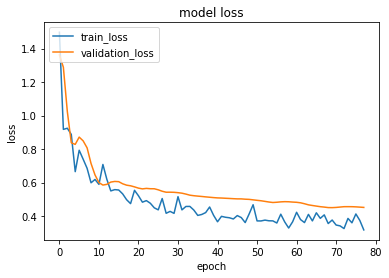

In [ ]:
plt.plot(history1.history['loss'], label='train_loss')
plt.plot(history1.history['val_loss'], label = 'validation_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

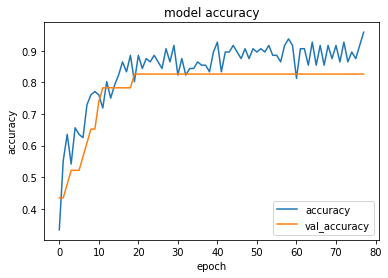

In [ ]:
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label= 'val_accuracy')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
  #model1.load_weights(file_path)

In [ ]:
model1.save_weights('model1_weights.h5')
model1.save('/content/drive/MyDrive/Capstone Project 4')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Capstone Project 4/assets


In [ ]:
model2 = tf.keras.applications.inception_v3.InceptionV3(
    include_top=False, weights='imagenet', input_tensor=None,
    input_shape=(150,150,3), classes=3,
    classifier_activation='softmax'
)
model2.trainable = False

add_model2 = Sequential()
add_model2.add(model2)
add_model2.add(Conv2D(filters=8, kernel_size=(2,2),input_shape=(150, 150, 3), activation='relu',))
add_model2.add(Conv2D(filters=16, kernel_size=(2,2),input_shape=(150, 150, 3), activation='relu',))
add_model2.add(MaxPool2D(pool_size=(1, 1)))
add_model2.add(Conv2D(filters=64, kernel_size=(1,1),input_shape=(150, 150, 3), activation='relu',))
add_model2.add(GlobalAveragePooling2D())
add_model2.add(Dropout(0.5))
add_model2.add(BatchNormalization())
add_model2.add(Dense(3,
                    activation='softmax'))
model2 = add_model2

model2.compile(  loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.SGD(learning_rate = 0.001, decay = 0.01, momentum = 0.9),
              metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                  patience = 8,
                                                  mode = 'auto')


In [ ]:
model2.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 3, 3, 2048)        21802784  
_________________________________________________________________
conv2d_3545 (Conv2D)         (None, 2, 2, 8)           65544     
_________________________________________________________________
conv2d_3546 (Conv2D)         (None, 1, 1, 16)          528       
_________________________________________________________________
max_pooling2d_153 (MaxPoolin (None, 1, 1, 16)          0         
_________________________________________________________________
conv2d_3547 (Conv2D)         (None, 1, 1, 64)          1088      
_________________________________________________________________
global_average_pooling2d_33  (None, 64)                0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 64)              

In [ ]:
history2 = model2.fit_generator(generator = train_generator,
                              validation_data=test_generator,
                              epochs=100, steps_per_epoch=3,
                              verbose=1, validation_steps=1,
                              callbacks=early_stopping)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
3/3 [==============================] - 15s 4s/step - loss: 1.3877 - accuracy: 0.3542 - val_loss: 1.0825 - val_accuracy: 0.3478
Epoch 2/100
3/3 [==============================] - 8s 3s/step - loss: 1.2914 - accuracy: 0.3333 - val_loss: 1.0814 - val_accuracy: 0.4783
Epoch 3/100
3/3 [==============================] - 8s 3s/step - loss: 1.1002 - accuracy: 0.4583 - val_loss: 1.0687 - val_accuracy: 0.4348
Epoch 4/100
3/3 [==============================] - 8s 3s/step - loss: 1.1966 - accuracy: 0.4583 - val_loss: 1.0221 - val_accuracy: 0.6087
Epoch 5/100
3/3 [==============================] - 8s 3s/step - loss: 1.2167 - accuracy: 0.3750 - val_loss: 0.9859 - val_accuracy: 0.5652
Epoch 6/100
3/3 [==============================] - 8s 3s/step - loss: 1.0688 - accuracy: 0.4583 - val_loss: 0.9694 - val_accuracy: 0.6522
Epoch 7/100
3/3 [==============================] - 8s 3s/step - loss: 1.0374 - accuracy: 0.5104 - val_loss: 0.9992 - val_accuracy: 0.5652
Epoch 8/100
3/3 [================

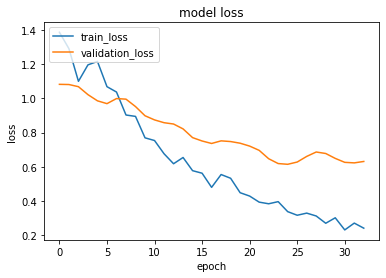

In [ ]:
plt.plot(history2.history['loss'], label='train_loss')
plt.plot(history2.history['val_loss'], label = 'validation_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

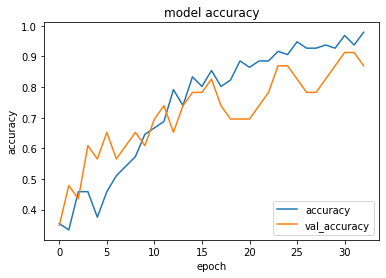

In [ ]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label= 'val_accuracy')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model2.save_weights('model2_weights.h5')
model2.save('/content/drive/MyDrive/Capstone Project 4')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Capstone Project 4/assets
